## Handwriting Recognition using K-Means

#### 1. From sklearn library, import the datasets module.
Then, load in the **digits** data using .load_digits() and print digits.DESCR, digits.data, digits.target.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

digits = datasets.load_digits()
print(digits.DESCR)
print(digits.data)
print(digits.target)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### 2. To visualize the data images, we need to use Matplotlib. 
Let’s visualize the image at index 100:

<Figure size 640x480 with 0 Axes>

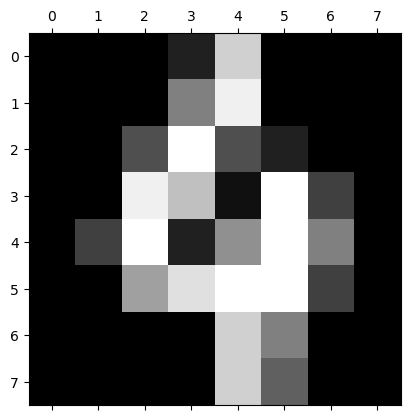

Target digit:  4


<Figure size 640x480 with 0 Axes>

In [2]:
plt.gray()
plt.matshow(digits.images[100])
plt.show()
plt.clf()
print("Target digit: ", digits.target[100])

#### 3. Let's visualize more than one image.

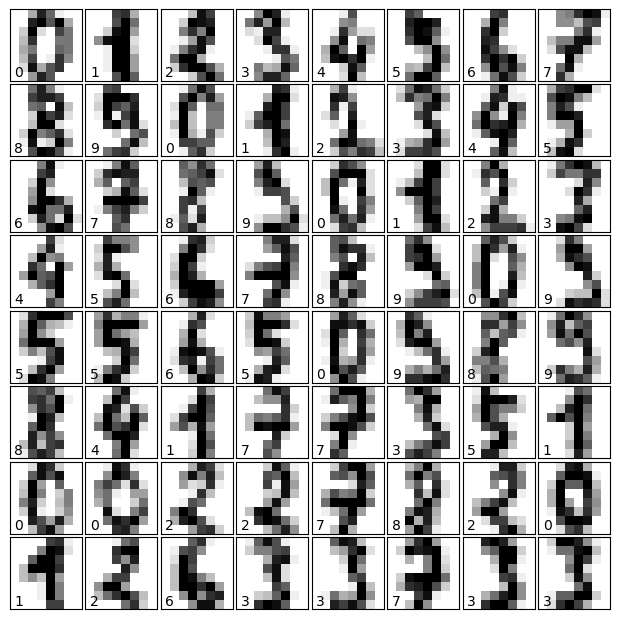

In [3]:
# Figure size (width, height)

fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images

for i in range(64):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position

    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position

    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value

    ax.text(0, 7, str(digits.target[i]))

plt.show()

#### 4. Let’s cluster the 1797 different digit images into 10 groups.

In [4]:
model = KMeans(n_clusters=10, n_init='auto', random_state=42)
model.fit(digits.data)

KMeans(n_clusters=10, n_init='auto', random_state=42)

#### 5. Visualizing after K-Means:
Let’s visualize all the centroids! Because data samples live in a 64-dimensional space, the centroids have values so they can be images! Scikit-learn calls centroids “cluster centers”. 
The cluster centers should be a list with 64 values (0-16). Here, we are making each of the cluster centers into an 8x8 2D array.

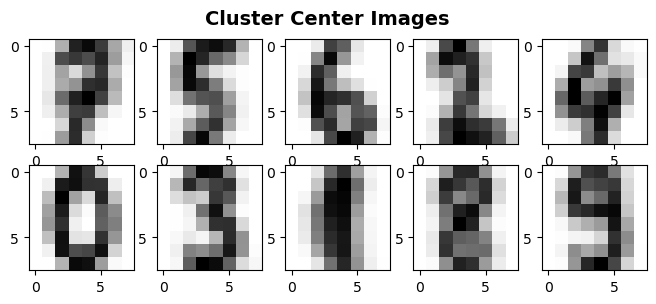

<Figure size 640x480 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(8, 3))

fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    #Initializing subplots for each position
    ax = fig.add_subplot(2, 5, 1+i)
    #Display images
    plt.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
    
plt.show()
plt.clf()

#### 6.Testing Your Model:
We made 4 handwritten numbers and saved them into 2D array.
Then created a new variable named *new_samples* and copy our the 2D array into it.
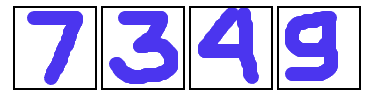

In [6]:
new_samples = np.array([
[0.00,3.66,5.34,5.34,5.34,5.34,3.81,0.00,0.00,3.66,5.34,5.34,5.41,7.55,5.72,0.00,0.00,0.00,0.00,0.00,1.91,7.62,2.59,0.00,0.00,0.00,0.00,0.00,4.88,7.47,0.38,0.00,0.00,0.00,0.00,0.61,7.47,4.35,0.00,0.00,0.00,0.00,0.00,3.74,7.62,1.53,0.00,0.00,0.00,0.00,0.23,7.17,5.41,0.00,0.00,0.00,0.00,0.00,0.30,5.03,1.22,0.00,0.00,0.00],
[0.00,2.06,5.34,5.34,5.34,5.34,2.21,0.00,0.00,2.06,5.34,5.34,6.10,7.62,3.51,0.00,0.00,0.00,0.00,0.84,5.80,7.24,0.69,0.00,0.00,0.00,0.00,6.79,7.62,7.63,5.26,0.23,0.00,0.61,0.00,3.35,3.43,4.27,7.63,3.58,2.67,7.55,2.21,0.00,0.00,1.14,7.24,3.81,0.53,6.86,7.55,6.40,7.63,7.62,7.24,1.83,0.00,0.76,4.12,4.57,3.66,2.90,0.76,0.00],
[0.00,0.00,0.15,6.02,7.47,7.32,0.00,0.00,0.00,0.00,4.80,7.62,5.64,7.62,1.14,0.00,0.00,3.13,7.62,3.96,1.52,7.62,1.52,0.00,1.30,7.40,7.17,3.13,3.96,7.62,1.52,0.00,1.75,7.55,7.62,7.62,7.62,7.62,1.98,0.00,0.00,0.00,0.00,0.00,0.53,7.55,4.19,0.00,0.00,0.00,0.00,0.00,0.00,6.10,5.34,0.00,0.00,0.00,0.00,0.00,0.00,2.36,3.05,0.00],
[0.00,0.69,2.59,4.04,5.26,3.81,0.00,0.00,0.84,7.17,7.62,7.55,7.24,5.57,0.00,0.00,2.97,7.62,1.75,0.00,5.34,5.34,0.00,0.00,2.90,7.62,4.34,3.89,7.40,5.34,0.00,0.00,0.23,5.11,6.86,6.86,7.24,6.56,0.00,0.00,0.00,0.76,0.76,0.84,5.03,6.86,0.00,0.00,2.67,7.62,7.62,7.62,7.62,4.42,0.00,0.00,0.38,2.29,2.29,2.29,1.60,0.00,0.00,0.00]
])

#### Now we predict digits.

In [7]:
new_labels = model.predict(new_samples)
print(new_labels)

[0 9 9 0]


By looking at the cluster centers, let’s map out each of the labels with the digits we think it represents:

In [8]:
cluster_digits = {0: '7', 1: '5', 2: '6', 3: '2', 4: '4', 5: '0', 6: '3', 7: '1', 8: '8', 9: '9'}
for k in range(len(new_labels)):
    print(cluster_digits[new_labels[k]], end=' ')


7 9 9 7 